In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.datasets import load_boston

03 線形モデル
===========

* `線形モデル`は実用的に広く知られており、この数十年の間盛んに研究されたモデルである

* 線形モデルは入力特徴量の`線形関数`を用いて予測を行うものである

## 1. 線形モデルによる回帰

* `回帰問題`では、`線形モデル`による一般的な予測式は以下のようになる

    * $x[0]$から$x[p]$は、ある1データポイントの特徴量(この例では特徴量の数は$p+1$)を示す
    
    * $w$と$b$は学習されたモデルのパラメータである
    
    * $\hat{y}$はモデルからの予測である

\begin{align}
\hat{y} = w[0]\times x[0] + w[1]\times x[1] + \cdots + w[p]\times x[p] + b
\end{align}


* 特徴量が1つしかないデータセットであれば、次のようになる

    * この式は直線を表す
    
    * $w[0]$：傾き
    
    * $b$：$y$切片
    
    * もっと特徴量がある場合には、$w$にはそれぞれの特徴量の軸に対する傾きが入ることになる
    
    * 別の考え方として、予測されるレスポンスは入力特徴量の重み付き和になることもできる
    
    * 重みは$w$で表され、負になることもある

\begin{align}
\hat{y} = w[0]\times x[0] + b
\end{align}

* 1次元の`wave`データセットで$w[0]$と$b$を求めてみると、以下の図で示したような線になる

/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


w[0]: 0.393906  b: -0.031804


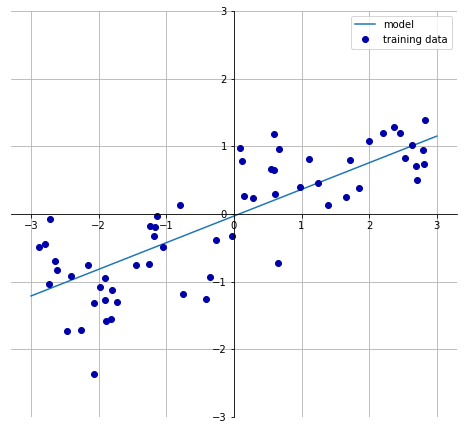

In [27]:
mglearn.plots.plot_linear_regression_wave()

* 線がわかりやすいように、座標軸もプロットした

* $w[0]$から、傾きはおよそ0.4になることがわかる

* $y$切片は、予測ラインが$y$軸と交わる点である

    * この場合、0の少し下になっていることが、図から読み取れる

* `回帰`における線形モデルは、単一の特徴量に対しては予測が直線になる回帰モデルとして特徴量付けられる

* 特徴量が2つなら予測は平面に、高次元においては予測は超平面になる

* このモデルで作られる直線と、`KNeighborsRegressor`による予測を比べると、直線で予測するのは制約が強すぎると感じる

    * データの細かいdetailが全て失われているように見える
    
    * このモデルは、ターゲット$y$が、特徴量の線形和で表すことができるという、強い(若干非現実的な)仮定を置いているため
    
    * ただし、1次元のデータを見ただけでは、少し歪んだ見方になる
    
    * 多数の特徴量を持つデータに対しては、線形モデルは非常に強力である
    
    * 特に、訓練データのデータポイント数よりも特徴量の数の方が多い場合には、どのような$y$でも完全に訓練データセットの線形関数としてモデル化できる
    
* 線形モデルを用いた回帰には、様々なアルゴリズムがある

    * これらのモデルの相違点は、パラメータ$w$と$b$を訓練データから学習する方法とモデルの複雑さを制御する方法にある

## 2. 線形回帰(通常最小二乗法)

* `線形回帰`(もしくは`通常最小二乗法`：OLS)は、最も単純で、最も古典的な線形回帰手法

    * `線形回帰`では、訓練データにおいて、予測と真の回帰ターゲット$y$との`平均二乗誤差`が最小になるように、パラメータ$w$と$b$を求める
    
    * `平均二乗誤差`は、予測と真の値との差を二乗したものの平均値である
    
    * `線形回帰`には、パラメータがない(モデルの複雑さを制御する方法がないことを意味する)

In [28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

* 「傾き」を表すパラメータ($w$)は、`重み`(または`係数`)と呼ばれ、`coef_`属性に格納される

* `オフセット`(もしくは`切片`$b$)は、`intercept_`属性に格納される

In [29]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


> scikit-learnでは、訓練データから得られた属性には全て最後にアンダースコア`_`をつける習慣になっている
>
> これは、ユーザが設定したパラメータと明確に区別するため

* `intercept_`属性は常に単独の浮動小数点数だが、`coef_`属性は入力特徴量ごとに1つの要素を持つNumPy配列となる

* waveデータセットでは、特徴量が1つしかないので、`lr.coef_`には1つしか要素がない

* 訓練セットとテストセットに対する性能は、以下の通り

In [30]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score:0.66


* $R^2$が0.66というのはあまり良くないが、訓練セットとテストセットに対する値が非常に近い

    * この理由は、おそらく適合不足であって、過剰適合でないことを意味する
    
    * このような1次元データセットでは、モデルがとても単純(もしくは制約されている)なので、過剰適合の危険は少ない
    
    * しかし、高次元のデータセットに対しては(データセットが多くの特徴量を持つ場合は)、線形モデルはより強力になるので、過剰適合の可能性が高くなる
    
* `LinearRegression`が、`boston_housing`データセットのような、より複雑なデータセットに対してどのような挙動を示すかを見る

    * このデータセットには、導出された104の特徴量を持つ506のサンプルがある
    
    * まず、データセットを読み込み、訓練セットとテストセットに分割し、そして線形回帰モデルを作る

In [32]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [33]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score:0.61


* このように、訓練セットとテストセットで性能が大きく異なるのは、過剰適合が起きている明らかな兆候である

    * したがって、複雑度を制御できるモデルを探す必要がある
    
    * 標準的な線形回帰に代わる最も一般的な手法は、`リッジ回帰`である

## 3. リッジ回帰

* `リッジ回帰`は、線形モデルによる回帰の1つである

    * 予測に用いられる式は、通常`最小二乗法`のものと同じである
    
    * しかし、`リッジ回帰`では、係数($w$)を、訓練データに対する予測だけでなく、他の制約に対しても最適化する
    
    * ここでは、係数の絶対値の大きさを可能な限り小さくしたい
    
        * つまり、$w$の要素をなるべく0に近くしたい
        
        * 直感的には、予測をうまく行いつつ、個々の特徴量が出力に与える影響をなるべく小さくする(傾きを小さくしたい)
        
        * この制約条件は、`正則化`の一例である
        
        * `正則化`：過剰適合を防ぐために明示的にモデルを制約すること
        
            * リッジ回帰では、`L2正規化`と呼ばれる
        
    * `リッジ回帰`は、`linear_model.Ridge`に実装されている
    
        * これを、`boston_housing`データセットで試してみる

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


* 結果より、`Ridge`の訓練セットに対するスコアは、

    * `LinearRegression`の場合よりも低く
    
    * テストセットに対するスコアは高い
    
    これは、期待された結果通りである
    
* `線形回帰`では、データに対して過剰適合していた

    * `Ridge`は、制約の強いモデルなので、過剰適合の危険は少ない
    
    * 複雑度の低いモデルは、訓練セットに対する性能は低いが、汎化性能は高い
    
    * 我々が興味を持っているのは汎化性能なので、`LinearRegression`モデルよりも`Ridge`モデルを使った方が良い

* `Ridge`モデルでは、

    * モデルの簡潔さ(0に近い係数の数)
    
    * 訓練セットに対する性能
    
    がトレードオフの関係になる
    
* このどちらに重きを置くかは、ユーザが`alpha`パラメータを用いて指定することができる

    * 先の例では、デフォルトの`alpha=1.0`を用いた
    
    * しかし、最良の`alpha`はデータセットに依存するので、最良とは限らない
    
    * `alpha`を増やすと、係数はより0に近くなり、訓練セットに対する性能は低下するが、汎化にはそちらの方が良い

In [35]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


* `alpha`を小さくすると、係数の制約は小さくなる

    * 訓練精度が上がり、テスト精度が下がる
    
    * `alpha`が非常に小さい値になると、係数への制約はほとんどなくなり、`LinearRegression`と同じような挙動となる

In [36]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


* このケースでは、`alpha=0.1`がうまくいっているように見える

    * 汎化性能を上げるためにはもう少し`alpha`を減らしても良いかもしれない
    
    * パラメータを適切に設定する手法については、別章で述べる
    
* `alpha`パラメータのモデルへの影響を定量的に知るには、様々な`alpha`に対するモデルの`coef_`属性を確認すると良い
    
    * `alpha`が大きくなるとモデルがより制約されるので、`alpha`が大きい場合は小さい場合よりも`coef_`の要素の絶対値が小さくなることが期待される

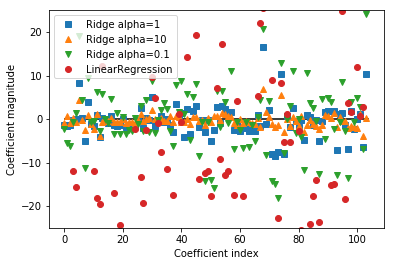

In [38]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

* $x$軸は、`coef_`の要素を表している

    * `x=0`は最初の特徴量に対する係数、`x=1`は2番目の特徴に対する係数、となっており、`x=100`まで続いている
    
* $y$軸は、特徴量に対応する係数の数値を表している

* この図からわかることは、

    * `alpha=10`では、ほとんどの係数が-3から3の間にあること
    
    * `Ridge`モデルの`alpha=1`ではもう少し広い範囲になる
    
    * `alpha=0.1`の点は、さらに広い範囲になる
    
    * 正則化されていない線形回帰の場合(`alpha=0`に対応)は、さらに広くなってこの図には表示されていないものもある

* 正則化の影響を理解するもう一つの方法として、`alpha`の値を固定して、利用できる訓練データの量を変化させるものがある

    * `boston_housing`データセットからサイズを大きくしながらデータを抽出して、`LinearRegression`と`Ridge(alpha=1)`で学習させた結果を評価したもの
    
    * この図は、モデルの性能をデータセットサイズの関数として表したもので、`学習曲線`と呼ばれる

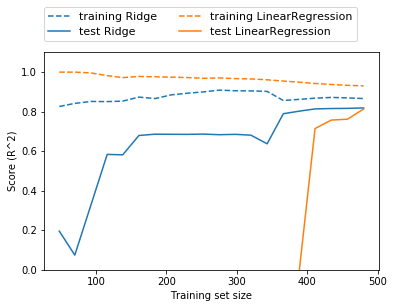

In [39]:
mglearn.plots.plot_ridge_n_samples()

* 期待される通り、リッジ回帰でも線形回帰でも、訓練スコアは全てのデータサイズに置いて、テストスコアよりも高い

    * リッジ回帰では正則化が行われているため、訓練スコアは線形回帰のものよりも常に低い
    
* しかし、テストスコアは、リッジ回帰の方が良い

    * 特にデータサイズが小さい時には顕著である
    
    * 400データポイント以下では、線形回帰は何も学習することができていない
    
    * データが増えれば増えるほど双方のモデルとも性能は向上し、最後には線形回帰が追いつく
    
* これからわかることは、十分な訓練データがある場合は、正則化はあまり重要でなくなることである

    * 十分なデータがあるならば、リッジ回帰と線形回帰は同じ性能を示す
    
    * 線形回帰では、訓練性能が低下してしまうことが挙げられる
    
    * データ量が多くなると、モデルが過剰適合すること、もしくはデータを覚えることが難しくなってしまうため

## 4. Lasso

* `Ridge`に代わる線形回帰として、`Lasso`がある

    * リッジ回帰と同様に、`Lasso`も係数が0になるように制約をかけるのだが、かけかたが少し違う(`L1正則化`と呼ばれる)
    
    * `L1正則化`の結果、`Lasso`においては、いくつかの係数が**完全に0になる**
    
        * これは、モデルにおいていくつかの特徴量が完全に無視されるということになる
        
        * 自動的に特徴量を選択していると考えても良い
        
    * いくつかの係数が0になると、モデルを解釈しやすくなり、どの特徴量が重要なのかが明らかになる
    
* `Lasso`を`boston_housing`データセットに適用してみる

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4.00


* ここからわかる通り、`Lasso`の性能は訓練セットに対しても、テストセットに対しても、非常に悪い

    * これは、適合不足であることを示唆する
    
    * さらに、104の特徴量のうちのわずか4つしか使っていない
    
* `Lasso`にも、係数を0に向かわせる強さを制御する正則化パラメータ`alpha`がある

    * 上の例ではデフォルトの`alpha=1.0`となっていた
    
    * 適合不足の度合を減らすためには、`alpha`を減らす必要がある
    
    * この際、`max_iter`(最大の繰り返し回数)をデフォルト値から増やしてやる必要がある

In [41]:
# "max_iter"の値を増やしている
# こうしておかないとモデルが、"max_iter"を増やすように警告を発する
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


* `alpha`を小さくすると、より複雑なモデルに適合するようになり、訓練データに対してもテストデータに対しても良い結果が得られている

    * 性能は`Ridge`よりも少しだけ良いぐらいだが、104の特徴量のうち、わずか33しか使っていない
    
    * これによってモデルは潜在的には理解しやすくなっている
    
* `alpha`を小さくしすぎると、リッジの場合と同様に正則化の効果が薄れ、過剰適合が発生し、性能は`LinearRegression`と似たようなものになる

In [42]:
lasso00001= Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


* 同様に、これらのモデルに対して係数をプロットする

Text(0, 0.5, 'Coefficient magnitude')

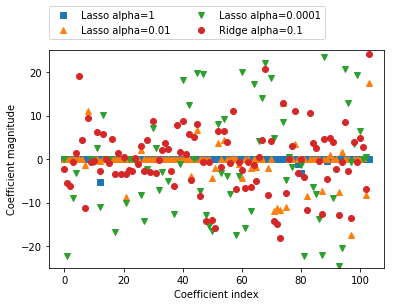

In [45]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^',  label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

* `alpha=1`の場合には、ほとんどの係数がゼロである

    * また、残りの係数の絶対値もかなり小さいことがわかる
    
* `alpha`を0.01に減らした場合の結果が**上向きの三角**である

    * ここでも、ほとんどの特徴量に対する係数はゼロである
    
* `alpha`を0.0001にすると、正則化がかなり緩む

    * 多くの係数がゼロでなくなり、絶対値も大きくなる
    
* 比較のために、最適な場合の`Ridge`の係数を**丸**で囲んだ

    * `alpha=0.1`の時の`Ridge`は、`alpha=0.01`の時の`Lasso`と同じような予測性能を示すが、`Ridge`では全ての係数がゼロでない

* 実際に使う場合には、この2つのうちでは`リッジ回帰`をまず試してみると良い

    * しかし、特徴量がたくさんあって、そのうち重要なものはわずかしかないことが予測される場合には、`Lasso`の方が向いている
    
    * 同様に、解釈しやすいモデルが欲しいのならば、重要な特徴量のサブセットを選んでくれる`Lasso`の方が理解しやすいモデルが得られる
    
* 実用上は、この組み合わせが最良の結果をもたらすが、それには`L1正則化`のパラメータと`L2正則化`のパラメータの2つを調整するというコストがある

## 5. クラス分類のための線形モデル

* `線形モデル`は、`クラス分類`にも多用されている

* まず、**2クラス分類**を見てみる

    * この場合は、以下の式で予測を行う
    
\begin{eqnarray}
\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b > 0
\end{eqnarray}

* この式は、`線形回帰`の場合と似ているが、特徴量の重み付き和を単に返すのではなく、予測された値が0を超えるかどうかで分割している

    * この関数の値が0より小さければ、クラスは-1になる
    
    * この関数の値が0より大きければ、クラスは+1になる
    
    * この予測のルールは、全ての線形モデルによるクラス分類に共通している
    
    * ここでも、係数($w$)と切片($b$)を求めるには様々な方法がある

* `線形モデル`による回帰では、出力$\hat{y}$は特徴量の線形関数となる

    * つまり、直線や平面、高次元では超平面になる
    
    * 線形モデルによる`クラス分類`では、**決定境界**が入力の線形関数になる
    
        * 言い換えると、線形の2クラス分類器は、2つのクラスを直線や平面や超平面で分割すること

* `線形モデル`を学習するには、様々なアルゴリズムがある

    * これらのアルゴリズムは、以下の2点で区別される
    
    1. 係数と切片の特定の組み合わせと訓練データの適合度を図る尺度
    
    1. 正規化を行うか。行うならどの方法を使うか
    
* 「訓練データへ適合度」を測る尺度は、アルゴリズムによって異なる

    * アルゴリズムによるクラス分類ミスを最小化するように$w$と$b$を調整したいと思うかもしれないが、技術上、数学的な理由からできない
    
    * 我々の目的には、上のリストの1番目のアイテム(`ロス関数`)はあまり意味がない

* `linear_model.LogisticRegression`に実装されている`ロジスティック回帰`と、`svm.LinearSVC`に実装されている`線形サポートベクタマシン`(SVM)は、最も一般的な線形クラス分類アルゴリズムである(SVC：サポートベクタクラス分類器)

    * 名前に反して``ロジスティック回帰`は、回帰アルゴリズムではなく**クラス分離アルゴリズム**である(線形回帰と混同しないように気をつける)
    
* `LogisticRegression`モデルと`LinearSVC`モデルを`forge`データセットに適用して、決定境界を可視化する

/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


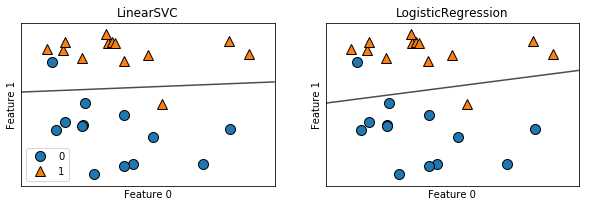

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

* この図は、以前と同じように`forge`データセットの第1特徴量を$x$軸に、第2特徴量を$y$軸にとり、`LinearSVC`と`LogisticRegression`で見つけた決定境界を直線で表示している

    * 直線の下がクラス0、上がクラス1になる
        
        * つまり、黒い線よりも上にあるデータポイントはクラス分類器によってクラス1に分類され、下にあるデータポイントはクラス0に分類される
        
     * 2つのモデルによる決定境界はよく似ている
     
         * 両方のモデルは共に、2つのポイントを他方のクラスに分類している
         
         * デフォルトではこれらのモデルは、`Ridge`が回帰で行なったのと同じように、`L2正則化`を行う

* `LogisticRegression`と`LinearSVC`における正則化の強度を決定するトレードオフパラメータは`C`と呼ばれ、`C`が大きくなると正則化は**弱くなる**

    * つまり、パラメータ`C`を大きくすると、`LogisticRegression`と`LinearSVC`は訓練データに対しての適合度を上げようとする
    
    * パラメータ`C`を小さくすると、係数ベクトル($w$)を0に近づけることを重視するようになる

* `C`の影響にはもう1つ面白い側面がある

    * 小さい`C`を用いると、データポイントの「大多数」に対して適合しようとする
    
    * 大きい`C`を用いると、個々のデータポイントを正確にクラス分類することを重視するようになる
    
* `LinearSVC`の場合の様子を見てみる

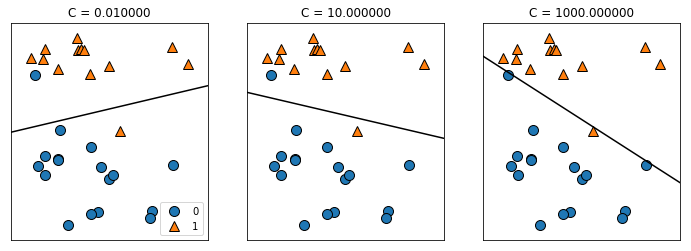

In [47]:
mglearn.plots.plot_linear_svc_regularization()

* 左のプロットは小さい`C`を用いていて、強力な正則化を行う場合に対応する

    * クラス0のほとんどの点が線の下に、クラス1のほとんどの点が線の上に来ている
    
* `C`が少し大きい場合に対応するのは、真ん中のグラフ

    * モデルは2点の分類に失敗したサンプルに着目するので、決定境界が傾いている
    
* 最後に、`C`がとても大きい場合に対応するのは右のグラフ

    * 決定境界はさらに急になり、クラス0の全ての点を正しくクラス分類するようになる
    
    * クラス1の点の1つはまだ失敗しているが、これは、このデータセットで直線で分類する場合には、全ての点を正しく分類することは不可能なため
    
    * このモデルは全ての点を正しくクラス分類することに注力するあまり、クラス全体としてのレイアウトを捉えきれていない(過剰適合している)

* 回帰の場合と同様に、`線形モデル`によるクラス分類は、低次元空間においては制約が強すぎるように思える

    * 決定平面が直線や平面にしかならないからである
    
    * しかし、高次元の場合は線形モデルによるクラス分類は非常に強力になるので、特徴量の数が多い場合には過剰適合を回避する方法が必要になる
    
* `LogisticRegression`を`cancer`データセットを用いてより詳しく解析する

In [48]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                                                        cancer.target,
                                                                                        stratify=cancer.target,
                                                                                        random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* デフォルトの`C=1`は、訓練セットとテストセットの双方で95%と、とても良い性能を示している

    * しかし、訓練セットとテストセットの精度がとても近いということは、適合不足の可能性が高い
    
    * `C`を増やしてより柔軟なモデルにしてみる

In [49]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.979
Test set score: 0.965


/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* `C=100`にすると、訓練セット精度が向上し、テストセット精度もわずかに向上する

    * 複雑なモデルの方が性能が高いはずだという直感は裏付けられた
    
* さらに強力に正則化したモデルを試してみる

     * デフォルトの`C=1`を`C=0.01`にする

In [50]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* 予想通り、すでに適合不足だったモデルの訓練セット精度もテストセット精度もデフォルトパラメータより悪くなっている

* 最後に、3つの正則化パラメータ`C`に対して学習された係数を見てみる

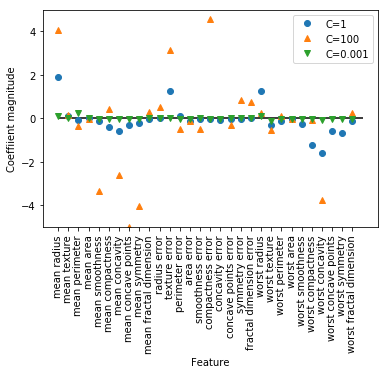

In [51]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coeffiient magnitude")
plt.legend()

> `LogisticRegression`では、デフォルトで`L2正則化`が行われる(結果は、`Ridge`によるものと似ている)
> 
> 正則化を強くすると、係数はより0近くへ押し込まれるが、0にはならない
>
> `mean_perimeter`のように、モデルによって係数の正負が変わってしまう
>
> そのため、線形係数の係数の解釈には常に眉に唾を付けて聞かないといけないことがわかる

* より解釈しやすいモデルが欲しいのならば、`L1正則化`を使うと良いかもしれない

    * この正則化はわずかな特徴量しか使わないように制限するため
    
    * `L1正則化`を行なった時の分類精度をプロットしたものを以下に示す

/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96


/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


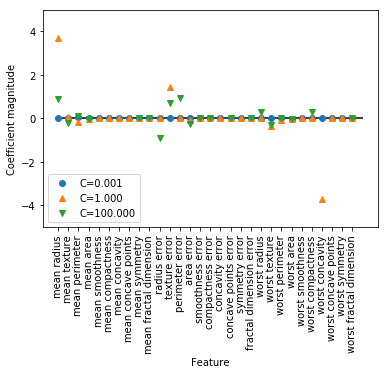

In [52]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

* この図からわかる通り、2クラス分類のための線形モデル群と、回帰のための線形モデル群には対応関係がある

    * 回帰の時と同じように、モデル間の主な違いは`penalty`パラメータにある
    
    * このパラメータがモデルの正則化と、特徴量を全て使うか一部しか使わないかに影響を与える

## 6. 線形モデルによる多クラス分類

* 多くの線形クラス分類モデルは、2クラス分離にしか適用できず、自然に多クラスの場合に拡張できるものではない(ロジスティック回帰は例外)

* 2クラス分類アルゴリズムを多クラス分類アルゴリズムに拡張する一般的な手法として、`1対その他`アプローチがある

    * このアプローチでは、各クラスに対してそのクラスと他の全てのクラスを分類する2クラス分類モデルを学習する
    
    * クラスがたくさんある場合にはたくさんの2クラス分類モデルを使うことになる
    
    * 予測の際には全ての2クラス分類器をテストデータポイントに対して実行する
    
        * 一番高いスコアのクラス分類器が「勝ち」、その分類器に対応するクラスが予測結果となる
        

* 1クラスにつき1つの2クラス分類器があるということは、クラスごとに係数ベクトル($w$)と切片($b$)があるということになる

    * 下に示す確信度を表す式の値が最も大きいクラスが、`クラスラベル`として割り当てられる
    
\begin{eqnarray}
w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b
\end{eqnarray}

* `多クラスロジスティック回帰`の背後にある数学は、`1対その他`アプローチとは少し異なるが、

    * 結局1クラスあたり係数ベクトルと切片ができるのは同じで、同じ手法で予測を行うことができる
    
* 単純な3クラス分類データセットに対して、`1対その他`手法を適用する

    * ここでは、各クラスをガウス分布でサンプリングした2次元データセットを用いる

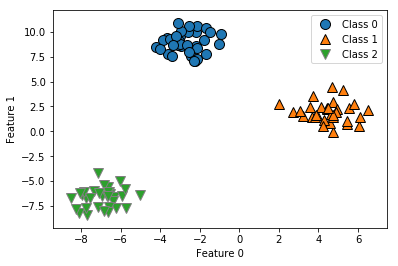

In [53]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

* これに、`LinearSVC`クラス分類器をこのデータセットで学習させてみる

In [54]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape:", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


* `coef_`配列の形は`(3, 2)`になっている

    * つまり、`coef_`の各行には各クラスに対応する係数ベクトルが入っており、各列には個々の特徴量(ここでは2つ)に対する係数が格納されている
    
* `intercept_`はこの場合は1次元配列になっていて、各クラスに対する切片が格納されている

* 3つのクラス分類器による直線を可視化する

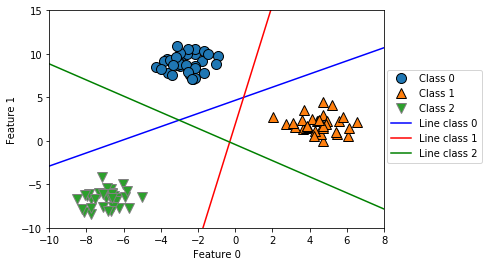

In [55]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

* 訓練データ中のクラス0に属する全ての点がクラス0に対応する直線よりも上にある

    * これはこのクラスの分類器で、「クラス0」の側に分類されたことを意味する
    
    * クラス0に属する点群は、クラス2に対応する線よりも上にある
    
    * これは、クラス2に対応するクラス分類器で「その他」の方に分類されたことを意味する
    
    * したがって、この領域にある全ての点は、最終的な分類器によってクラス0に分類される
        
        * クラス分類確信度の式がクラス0の分類器では０より大きくなり、他の分類器では0より小さくなる
        
* しかし、このグラフの中央の三角形の部分はどうなるか？

    * 3つのクラス分類器は全て、この領域の点を「その他」と分類する
    
    * この領域の点をどこに分類すれば良いか
    
        * 答えは、「クラス分類式の値が一番大きいクラス」(その点に最も近い線を持つクラス)
        
* 下に示す例は、2次元空間全ての点に対する予測を描画したもの

Text(0, 0.5, 'Feature 1')

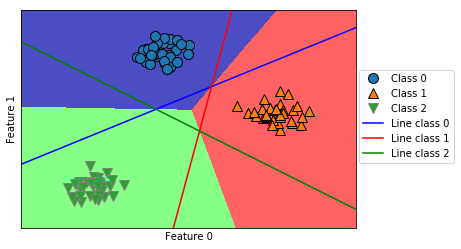

In [56]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept)/ coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 7. 利点、欠点、パラメータ

* 線形モデルの主要なパラメータは、

    * 回帰モデルでは、`alpha`
    
    * `LinearSVC`と`LogisticRegression`では、`C`と呼ばれる正則化パラメータ

* `alpha`が大きい場合、`C`が小さい場合は単純なモデルに対応する

    * 特に回帰モデルの場合、このパラメータの調整は非常に重要になる
    
    * 通常、`C`や`alpha`を調整する際には、対数スケールで値を変更する
    
* もう1つ決めなければならないことは、`L1正則化`を使うか、`L2正則化`を使うか

    * 一部の特徴量だけが重要だと思うならば、`L1`を使う
    
    * そうでなければ、デフォルトとしては`L2`を使う
    
    * `L1`はモデルの解釈のしやすさが重要な場合にも有用である
    
    * `L1`を使うと、少数の特徴量しか使わなくなるので、どの特徴量がそのモデルにとって重要なのか、その特徴量がどのような効果を持つのか説明しやすい

* 線形モデルの訓練は非常に高速で、さらに予測も高速である

    * 非常に大きいデータセットにも適用できるし、疎なデータに対してもうまく機能する
    
    * サンプルが10万点、100万点もあるようなデータに対しては、`LogisticRegression`と`Ridge`に`solver='sag'`オプションを使うことを検討する
    
        * このオプションでは、大きなデータセットに対して、デフォルトの場合よりも高速な場合がある
     
     * もう一つの方法としては、`SGDClassifier`クラスと`SGDRegressor`クラスを使う方法がある
     
         * これらのクラスは、ここで述べたモデルよりもさらに大規模なデータに適した線形モデルを実装している

* 線形モデルのもう1つの利点は、予測手法が比較的理解しやすいことが挙げられる

    * 回帰予測や分類予測は先に示した式によって行われる
    
    * しかし、残念なことに、係数がどうしてその値になっているのかは、それほど明らかでない
    
    * 特にデータセット中に、強く相関した特徴量がある場合はわかりにくい(この場合には、係数の意味を理解するのは難しい)

* 線形モデルは、特徴量の数がサンプルの個数よりも多い時に性能を発揮する

    * 大きなデータセットに対して適用されることも多いが、これは単に他のモデルでは学習できないからである
    
    * しかし、低次元空間では、他のモデルの方が良い汎化性能を示すこともある

|  版  |   年/月/日   |
|-----|-----------------|
|初版|2019/03/02|